In [1]:
from PIL import Image
from os import system
import numpy as np
import imageio
import matplotlib.pyplot as plt
import requests
import bentoml
import json
import cv2

bentoml.__version__

'0.13.1'

## ENVIO DE IMAGEN CON PARAMETRO DE CONFIGURACIÓN { ID, PROBABILIDAD, TAMAÑO ROSTRO }

In [2]:
import json
import shortuuid
import requests
urlimg = "/media/ossun/Backup/PROJECTOS/FaceCelsia/img/face.jpg"
with open( urlimg, "rb") as f:
    image_bytes = f.read()  # from file path

idc = shortuuid.ShortUUID().random(length=10)
idc = 'CAM' + idc 
config = {"idc":idc, "thr": 0.6, "size": 12}
json_bytes = json.dumps(config).encode('utf-8')
files = {
    "image": ("image.jpg", image_bytes),
    "annotations": ("config.json", json_bytes)
    }
filesenco = {
    "image": ("image.jpg", image_bytes), 
    }

In [3]:
response = requests.post('http://127.0.0.1:5000/FACE_DETECTION', files=files)
data = response.json()
response.text

'[["CAMCB76iKqpj6"], [[154, 99, 369, 437]]]'

[[154, 99, 369, 437]]


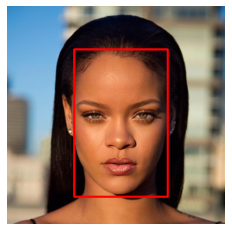

In [4]:
import cv2

img = cv2.imread(urlimg)
faces = data
print(faces[1])
for b in faces[1]:
    cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 3)
cv2.imwrite('/media/ossun/Backup/PROJECTOS/FaceCelsia/img/imgcv2.jpg', img)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
response = requests.post('http://127.0.0.1:5000/FACE_ENCODING', files=filesenco)
response.text

'[[[-0.3767203092575073, -0.20654946565628052, 1.9239999055862427, -0.4492745101451874, 1.9301235675811768, 2.0385048389434814, 1.9885661602020264, -0.1574104279279709, -0.8702654242515564, -2.9736483097076416, 2.481736898422241, -3.9593441486358643, 0.6373238563537598, 0.7810441255569458, -3.2777938842773438, -2.994504928588867, 2.061154365539551, -5.0078511238098145, -0.646588146686554, -3.2948288917541504, 3.420889377593994, -7.401655673980713, 0.7918959856033325, 4.574523448944092, 1.6892046928405762, 3.6872406005859375, 2.626859188079834, -0.3518957495689392, -0.5286150574684143, -5.466098785400391, -0.12115438282489777, 4.771598815917969, -1.3246464729309082, 1.51738440990448, -0.8606230020523071, 1.4190354347229004, 3.420819044113159, -0.6529722213745117, 0.2305835783481598, 1.3314802646636963, 2.467252492904663, 1.1779447793960571, 2.412755250930786, 0.37878045439720154, -5.600403785705566, 3.907212972640991, 4.0784454345703125, 1.061577320098877, 0.07197154313325882, -7.378525

In [6]:
response = requests.post('http://127.0.0.1:5000/FACE_INTEGRATION', files=files)
data = response.json()
response.text

'[["CAMCB76iKqpj6"], [[0.3758141100406647, 1.503951907157898, 0.3185330927371979, 0.6921520829200745, 0.7982112169265747, 1.4050389528274536, 0.662401556968689, -1.0184924602508545, -0.2428673803806305, -2.611384630203247, 1.5061284303665161, -2.260561943054199, -1.6141146421432495, 1.5210895538330078, -2.3605499267578125, -0.7234558463096619, 1.7494090795516968, -1.2465754747390747, -0.23882299661636353, 0.1087777316570282, 0.3249567449092865, -1.331945776939392, 1.079939842224121, 1.5097733736038208, 1.2956485748291016, 1.676513910293579, 2.0158376693725586, 0.7749172449111938, -0.6046167016029358, -2.6713061332702637, 0.31869035959243774, 2.3533835411071777, -0.41133466362953186, 0.7653185129165649, -0.6075842380523682, 0.7911238670349121, 1.9388498067855835, -1.1075721979141235, 0.6054085493087769, 1.5153815746307373, -1.8132365942001343, -1.6237273216247559, -0.18881502747535706, -1.0652780532836914, -1.468352198600769, 1.8622007369995117, 0.6219488978385925, 0.11451224982738495, 

# **Solicitud Asincrona**

In [12]:
import aiohttp
import asyncio
import cv2
import nest_asyncio
nest_asyncio.apply()    
import ujson
import json
import shortuuid

aiohttp.__version__

'3.7.4.post0'

### **Función Asincrona**

In [8]:
async def querysyncro(urls, files): 
    connector = aiohttp.TCPConnector(limit= None)    
    async with aiohttp.ClientSession(connector= connector) as session:        
        async with session.post(url= urls, data= files) as Respuesta:
            print(await Respuesta.text())   

In [5]:
idc = shortuuid.ShortUUID().random(length=10)
idc = 'CAM' + idc 

### **Solicitud a condificación de imagen: Entrada -> IMAGEN**

In [10]:
urlencoding = 'http://127.0.0.1:5000/FACE_ENCODING'
img = {'image': open(urlimg, 'rb')}

loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urlencoding, img))
loop.run_until_complete(task)

[[[-0.3767203092575073, -0.20654946565628052, 1.9239999055862427, -0.4492745101451874, 1.9301235675811768, 2.0385048389434814, 1.9885661602020264, -0.1574104279279709, -0.8702654242515564, -2.9736483097076416, 2.481736898422241, -3.9593441486358643, 0.6373238563537598, 0.7810441255569458, -3.2777938842773438, -2.994504928588867, 2.061154365539551, -5.0078511238098145, -0.646588146686554, -3.2948288917541504, 3.420889377593994, -7.401655673980713, 0.7918959856033325, 4.574523448944092, 1.6892046928405762, 3.6872406005859375, 2.626859188079834, -0.3518957495689392, -0.5286150574684143, -5.466098785400391, -0.12115438282489777, 4.771598815917969, -1.3246464729309082, 1.51738440990448, -0.8606230020523071, 1.4190354347229004, 3.420819044113159, -0.6529722213745117, 0.2305835783481598, 1.3314802646636963, 2.467252492904663, 1.1779447793960571, 2.412755250930786, 0.37878045439720154, -5.600403785705566, 3.907212972640991, 4.0784454345703125, 1.061577320098877, 0.07197154313325882, -7.3785252

### **Solicitud a detección de rostros: Entrada -> imagen + json(Parametros de configuración(id,probabilidad,tamaño de rostro minimo px))**

In [11]:
urldeteccion = 'http://127.0.0.1:5000/FACE_DETECTION'

config = {"idc":idc, "thr": 0.6, "size": 12}
json_config = json.dumps(config).encode('utf-8')
img = { 'image': open(urlimg, 'rb'), 'annotations':  json_config }

loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urldeteccion, img))
loop.run_until_complete(task)

[["CAM4yezQpAFbt"], [[154, 99, 369, 437]]]


### **Solicitud a detección y codificación de rostros: Entrada -> imagen + json(Parametros de configuración(id,probabilidad,tamaño de rostro minimo px))**

In [12]:
urlintegration = 'http://127.0.0.1:5000/FACE_INTEGRATION'

config = {"idc":idc, "thr": 0.6, "size": 12}
json_config = json.dumps(config).encode('utf-8')
img = { 'image': open(urlimg, 'rb'), 'annotations':  json_config }

loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urlintegration, img))
loop.run_until_complete(task)

[["CAM4yezQpAFbt"], [[0.3758141100406647, 1.503951907157898, 0.3185330927371979, 0.6921520829200745, 0.7982112169265747, 1.4050389528274536, 0.662401556968689, -1.0184924602508545, -0.2428673803806305, -2.611384630203247, 1.5061284303665161, -2.260561943054199, -1.6141146421432495, 1.5210895538330078, -2.3605499267578125, -0.7234558463096619, 1.7494090795516968, -1.2465754747390747, -0.23882299661636353, 0.1087777316570282, 0.3249567449092865, -1.331945776939392, 1.079939842224121, 1.5097733736038208, 1.2956485748291016, 1.676513910293579, 2.0158376693725586, 0.7749172449111938, -0.6046167016029358, -2.6713061332702637, 0.31869035959243774, 2.3533835411071777, -0.41133466362953186, 0.7653185129165649, -0.6075842380523682, 0.7911238670349121, 1.9388498067855835, -1.1075721979141235, 0.6054085493087769, 1.5153815746307373, -1.8132365942001343, -1.6237273216247559, -0.18881502747535706, -1.0652780532836914, -1.468352198600769, 1.8622007369995117, 0.6219488978385925, 0.11451224982738495, -

# **Usando FRAME de OPENCV**

### **FUNCION DE ASYNCRONA**

In [19]:
async def querysyncro(urls, files): 
    connector = aiohttp.TCPConnector(limit= None)    
    async with aiohttp.ClientSession(connector= connector) as session:        
        async with session.post(url= urls, data= files) as Respuesta:
            #print(await Respuesta.text()) 
            return await Respuesta.text()

### **Solicitud de Detección de Rostro**

In [14]:
urldeteccion = 'http://127.0.0.1:5000/FACE_DETECTION'
#JSON _> Parametros.
config = {"idc":idc, "thr": 0.6, "size": 12}
json_config = json.dumps(config).encode('utf-8')
#FRAME_> OpenCV.
FRAME = cv2.imread(urlimg)
encode_param=[int(cv2.IMWRITE_JPEG_QUALITY),100]
img = cv2.imencode('.jpg', FRAME, encode_param)[1].tobytes()
#DATA_>
#DATA_> Estructura de datos.
datas = FormData()
datas.add_field('image', img, filename='image.jpg', content_type= 'image/jpg')
datas.add_field('annotations', json_config, filename='annotations.json', content_type='application/json')
#SEND_> Solicitud Asincrona.
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urldeteccion, datas))
loop.run_until_complete(task)

NameError: name 'FormData' is not defined

### **Solicitud de Codificación de Imagen**

In [ ]:
from aiohttp import FormData
urlencoding = 'http://127.0.0.1:5000/FACE_ENCODING'
#FRAME_> OpenCV.
FRAME = cv2.imread(urlimg) # Remplazar por FRAME DEl VIDEO
encode_param=[int(cv2.IMWRITE_JPEG_QUALITY),100]
img = cv2.imencode('.jpg', FRAME, encode_param)[1].tobytes()
#DATA_> Estructura de datos.
datas = FormData()
datas.add_field('image', img, filename='image.jpg', content_type= 'image/jpg')
#SEND_> Solicitud Asincrona.
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urlencoding, datas))
loop.run_until_complete(task)

[[[-0.3742069900035858, -0.20771317183971405, 1.912036657333374, -0.44695162773132324, 1.9225363731384277, 2.028231143951416, 1.9899852275848389, -0.1548144519329071, -0.8707461953163147, -2.96342134475708, 2.467242479324341, -3.9505932331085205, 0.6352145671844482, 0.7854551076889038, -3.2652266025543213, -2.9855706691741943, 2.0626816749572754, -4.98286771774292, -0.6526325941085815, -3.2855207920074463, 3.4064364433288574, -7.374873161315918, 0.7835203409194946, 4.560336112976074, 1.669386386871338, 3.6698989868164062, 2.6054627895355225, -0.35017967224121094, -0.527803897857666, -5.4447340965271, -0.1171041876077652, 4.755899429321289, -1.3262897729873657, 1.5148555040359497, -0.8572909832000732, 1.4056806564331055, 3.414372682571411, -0.6456946730613708, 0.24313634634017944, 1.3168712854385376, 2.4503142833709717, 1.1725585460662842, 2.415515184402466, 0.3661081790924072, -5.584587574005127, 3.9012274742126465, 4.069507598876953, 1.051053762435913, 0.06199004501104355, -7.35037755

### **Solicitud Detección + Codfificación**

In [ ]:
from aiohttp import FormData
urlintegration = 'http://127.0.0.1:5000/FACE_INTEGRATION'
#JSON _> Parametros.
config = {"idc":idc, "thr": 0.6, "size": 12}
json_config = json.dumps(config).encode('utf-8')
#FRAME_> OpenCV.
FRAME = cv2.imread(urlimg) # Remplazar por FRAME DEl VIDEO
encode_param=[int(cv2.IMWRITE_JPEG_QUALITY),100]
img = cv2.imencode('.jpg', FRAME, encode_param)[1].tobytes()
#DATA_> Estructura de datos.
datas = FormData()
datas.add_field('image', img, filename='image.jpg', content_type= 'image/jpg')
datas.add_field('annotations', json_config, filename='annotations.json', content_type='application/json')
#SEND_> Solicitud Asincrona.
loop = asyncio.get_event_loop()
task = asyncio.ensure_future(querysyncro(urlintegration, datas))
loop.run_until_complete(task)

[["CAM9WfCuKHTF2"], [[0.31842169165611267, 1.4185224771499634, 0.2886295020580292, 0.7315367460250854, 0.8147603869438171, 1.344240427017212, 0.6785616874694824, -1.065164566040039, -0.27549463510513306, -2.6939785480499268, 1.5096973180770874, -2.328958511352539, -1.6204577684402466, 1.5543631315231323, -2.365816593170166, -0.7289379835128784, 1.7284150123596191, -1.2548433542251587, -0.30732545256614685, 0.06442396342754364, 0.34423890709877014, -1.3677490949630737, 1.0751562118530273, 1.4882915019989014, 1.3250956535339355, 1.6925679445266724, 1.974459171295166, 0.733576238155365, -0.6279603838920593, -2.577420473098755, 0.35219696164131165, 2.3851559162139893, -0.42020970582962036, 0.7664359211921692, -0.5531270503997803, 0.8298567533493042, 1.978737235069275, -1.1107290983200073, 0.6646597981452942, 1.5612996816635132, -1.7308579683303833, -1.599852204322815, -0.21701189875602722, -1.1063363552093506, -1.3997303247451782, 1.760414481163025, 0.6042327284812927, 0.20048843324184418,

## **Servicio de ML y Elasticsearch**

### **1.REGISTRO PERSONAS**

In [67]:
async def querysyncro(urls, files): 
    connector = aiohttp.TCPConnector(limit= None)    
    async with aiohttp.ClientSession(connector= connector) as session:        
        async with session.post(url= urls, data= files) as Respuesta:
            #print(await Respuesta.text()) 
            return await Respuesta.json()

from aiohttp import FormData
import json
urlregitro = 'http://127.0.0.1:5000/REGISTRO'
#JSON _> Parametros.
nombre = "Albeiro Buendia Diago"
cc = 1113619811
access = True
host = "localhost"
port = 9200
indexwrite = "facencoding"
imgf =  "/media/ossun/Backup/PROJECTOS/FaceCelsia/img/Img_registro/A.jpg"
imgld = "/media/ossun/Backup/PROJECTOS/FaceCelsia/img/Img_registro/B.jpg"
imgli = "/media/ossun/Backup/PROJECTOS/FaceCelsia/img/Img_registro/C.jpg"
IMG = [imgf, imgld, imgli]
config = {"idc":idc, "thr": 0.85, "size": 12, "name": nombre, "CC": cc, "Access": access, "host": host,
"port": port, "indexwrite": indexwrite }
json_config = json.dumps(config).encode('utf-8')
#FRAME_> OpenCV.
for urlimg in IMG:
    FRAME = cv2.imread(urlimg) # Remplazar por FRAME DEl VIDEO
    img = cv2.imencode('.jpg', FRAME)[1].tobytes()
    #DATA_> Estructura de datos.
    datas = FormData()
    datas.add_field('image', img, filename='image.jpg', content_type= 'image/jpg')
    datas.add_field('annotations', json_config, filename='annotations.json', content_type='application/json')
    #SEND_> Solicitud Asincrona.
    loop = asyncio.get_event_loop()
    task = asyncio.ensure_future(querysyncro(urlregitro, datas))
    resp = loop.run_until_complete(task)
    assert resp["_shards"]["successful"] == 1
   


### **2.LECTURA DE ACTIVIDADES**

In [70]:
async def querysyncro(urls, files): 
    connector = aiohttp.TCPConnector(limit= None)    
    async with aiohttp.ClientSession(connector= connector) as session:        
        async with session.post(url= urls, data= files) as Respuesta:
            #print(await Respuesta.text()) 
            return await Respuesta.json()

from aiohttp import FormData
import json
urlregitro = 'http://127.0.0.1:5000/READFILTRO'
#JSON _> Parametros.1
host = "localhost"
port = 9200
indexread = "activity"
# Las fechas deben contener al Z al final para la zona horaria
# Si se usa "now" es el limite actual
fmin = "2021-08-20T16:10:10Z" 
fmax = "now"
config = {"host": host, "port": port, "indexread": indexread, "fmin": fmin, "fmax": fmax }
json_config = json.dumps(config).encode('utf-8')
#FRAME_> OpenCV.

#DATA_> Estructura de datos.
datas = FormData()
datas.add_field('annotations', json_config, filename='annotations.json', content_type='application/json')
#SEND_> Solicitud Asincrona.
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)
task = querysyncro(urlregitro, datas)
resp = loop.run_until_complete(task)
print(resp)

[{'title_date': '2021-08-21T11:06:41.650150', 'title_idcam': 'HAX1JG', 'title_uuid': 'ec6e4904-59b6-4d03-8c81-e01b366ab857', 'title_name': 'Desconocido', 'title_identy': 0, 'title_score': 0.82, 'title_authorization': False, 'title_imagen': 'Qk0acQAAAAAAADYAAAAoAAAAcQAAAFUAAAABABgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALHSSKXKQJm+OI3KTKn+kOpCwNYaoIWmKE01qFUxnK2qJNHaUKGuHLVhxSU1YjoB5mYZ6rpuPsqCUtqGWspyOspyMsZiKsJeJrpSGq4+Cp4t9o4Z6ooR3oH9zm3tvnn5ynXtwmXZrmHZrpYR7q46Bs5aJt5mNtpiNtZaMtZWLr4+IrYyFrI2Fp4iAnIB3kHRrh21le2Bci25kn4F0mXtuknFmjWtgi2hbh2NWhF9SgV1OfltJdFA9bk05SCgWQyAXSSgfTCwiTS0jUzMpWDgtXj4yZkM4cUxCd1JHfltOgmNUh2ZYh2dYhmZYgWFTg2JUgmBSgmBTiGZYiWdYhmJQhmBQhmJShmRUhGVUg2RTgGNSf2FSf2JTe2BQfWJSel9PeV5Od11NdVxLdF9LdWBMcl5JaVhDaFlHZVhFa11NWkg3MiMWMzQxKj9ECBolAhkoIEJSACdwjidvjidxjyRzlCp/ojSMrS9/pBZcfBdNayNWcjNzkDN0kypohjZbcklIT7KhlrCgjq+djbKeka+bj7Gcj7OdjrKcjLCXia6Thq6Qg6mLfqaHe6SBdqSBdp17bp17a5x4aZx6bJt4a6OAc6eGeq6Pg7GTiLWXjbiakLeZjrCRiquOh6WGgZx8e5BvcINjYoZnZIFjWq2NgqyMgKSEeJ5+c5h1a5dyZ5VwZZFsX49